# Merge the Dateset

In [1]:
import pandas as pd
import numpy as np
import zipfile

# Function to load CSV from a ZIP file with multiple files
def load_csv_from_zip(zip_path, csv_filename):
    with zipfile.ZipFile(zip_path, 'r') as z:
        # Extract and read the specific CSV file
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

# Load datasets from zipped CSV files specifying the correct CSV filenames
df_ca = load_csv_from_zip('Datasets/CAvideos.csv.zip', 'CAvideos.csv')
df_de = load_csv_from_zip('Datasets/DEvideos.csv.zip', 'DEvideos.csv')
df_fr = load_csv_from_zip('Datasets/FRvideos.csv.zip', 'FRvideos.csv')
df_gb = load_csv_from_zip('Datasets/GBvideos.csv.zip', 'GBvideos.csv')
df_us = load_csv_from_zip('Datasets/USvideos.csv.zip', 'USvideos.csv')

# Add a new column 'location' to each DataFrame
df_ca['location'] = 'China'
df_de['location'] = 'Germany'
df_fr['location'] = 'France'
df_gb['location'] = 'Great Britain'
df_us['location'] = 'USA'

# Concatenate all DataFrames
merged_df = pd.concat([df_ca, df_de, df_fr, df_gb, df_us], ignore_index=True)

# Check the first few rows of the merged DataFrame
print(merged_df.head())

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

In [2]:
# drop missing values
merged_df1 = merged_df.dropna()

In [3]:
!pip install nltk

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Get the list of default English stopwords
stop_words = set(stopwords.words('english'))
stop_words = set(stopwords.words('chinese'))
stop_words = set(stopwords.words('french'))
stop_words = set(stopwords.words('german'))

# Function to remove stopwords and clean text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove non-alphabetical characters (retain only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split text into words
    words = text.split()
    
    # Remove stopwords
    remove_stopwords = [word for word in words if word not in stop_words]
    
    # Join the cleaned words back into a string
    new_text = ' '.join(remove_stopwords)
    
    return new_text
    data = {'title','description','text'}
    
# Apply the clean_text function to the 'title' column in merged_df1
merged_df1['new_text'] = merged_df1['title'].apply(clean_text)

# Display the cleaned DataFrame
print(merged_df1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yujiacao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           video_id trending_date  \
0       n1WpP7iowLc      17.14.11   
1       0dBIkQ4Mz1M      17.14.11   
2       5qpjK5DgCt4      17.14.11   
3       d380meD0W0M      17.14.11   
4       2Vv-BfVoq4g      17.14.11   
...             ...           ...   
202304  1PhPYr_9zRY      18.14.06   
202305  BZt0qjTWNhw      18.14.06   
202307  D6Oy4LfoqsU      18.14.06   
202308  oV0zkMe1K8s      18.14.06   
202309  ooyjaVdt-jA      18.14.06   

                                                    title  \
0              Eminem - Walk On Water (Audio) ft. Beyoncé   
1                           PLUSH - Bad Unboxing Fan Mail   
2       Racist Superman | Rudy Mancuso, King Bach & Le...   
3                                I Dare You: GOING BALD!?   
4             Ed Sheeran - Perfect (Official Music Video)   
...                                                   ...   
202304  BTS Plays With Puppies While Answering Fan Que...   
202305                       The Cat Who Caught the Laser   
202307

/var/folders/6z/mn847gls7x5fvn9pl3c9lfmw0000gn/T/ipykernel_9244/299217955.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['new_text'] = merged_df1['title'].apply(clean_text)


In [5]:
#drop columns needed
merged_df1.drop(columns=['thumbnail_link', 'video_id','comments_disabled','ratings_disabled','video_error_or_removed'], inplace=True)

print(merged_df1.head())

  trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3      nigahiga           24  2017-11-12T18:01:41.000Z   
4    Ed Sheeran           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  ra

/var/folders/6z/mn847gls7x5fvn9pl3c9lfmw0000gn/T/ipykernel_9244/1943813935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1.drop(columns=['thumbnail_link', 'video_id','comments_disabled','ratings_disabled','video_error_or_removed'], inplace=True)


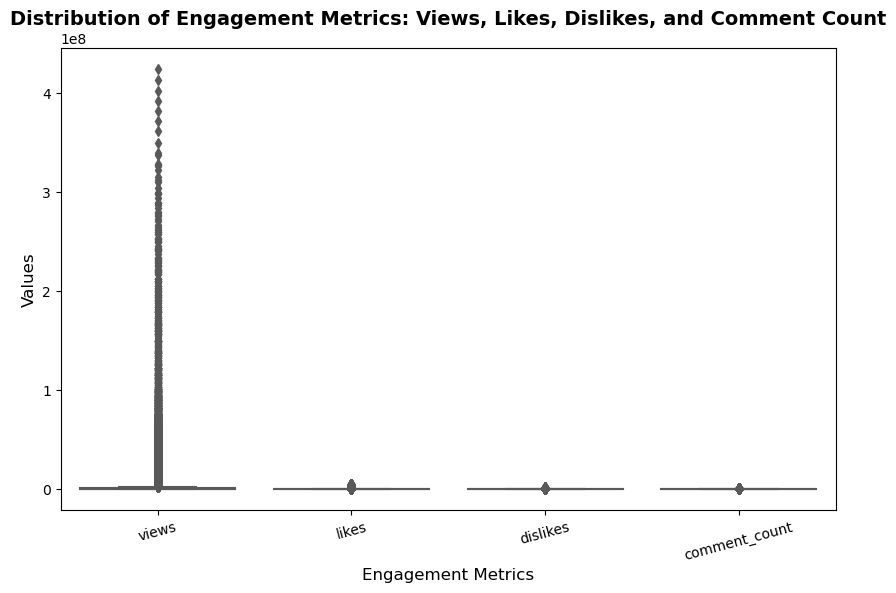

In [10]:
# outlier treatment part 1
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot with enhanced aesthetics
plt.figure(figsize=(10, 6))  # Adjust figure size for better clarity
sns.boxplot(data=merged_df[['views', 'likes', 'dislikes', 'comment_count']], palette="Set2")

# Add a title and labels to make the plot more informative
plt.title('Distribution of Engagement Metrics: Views, Likes, Dislikes, and Comment Count', fontsize=14, fontweight='bold')
plt.xlabel('Engagement Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15)

# Display the plot
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['views'])  # Drop 'views' from features to get X
y = merged_df['views']
# Assuming you have a dataset with features X and target y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

train = pd.DataFrame(X_train)
train['views'] = y_train.values

test = pd.DataFrame(X_test)
test['views'] = y_test.values

In [12]:
# Check the data types of each column
print(train.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
location                  object
views                      int64
dtype: object


# Exploration of Data Analysis(EDA) for Numerical Variables

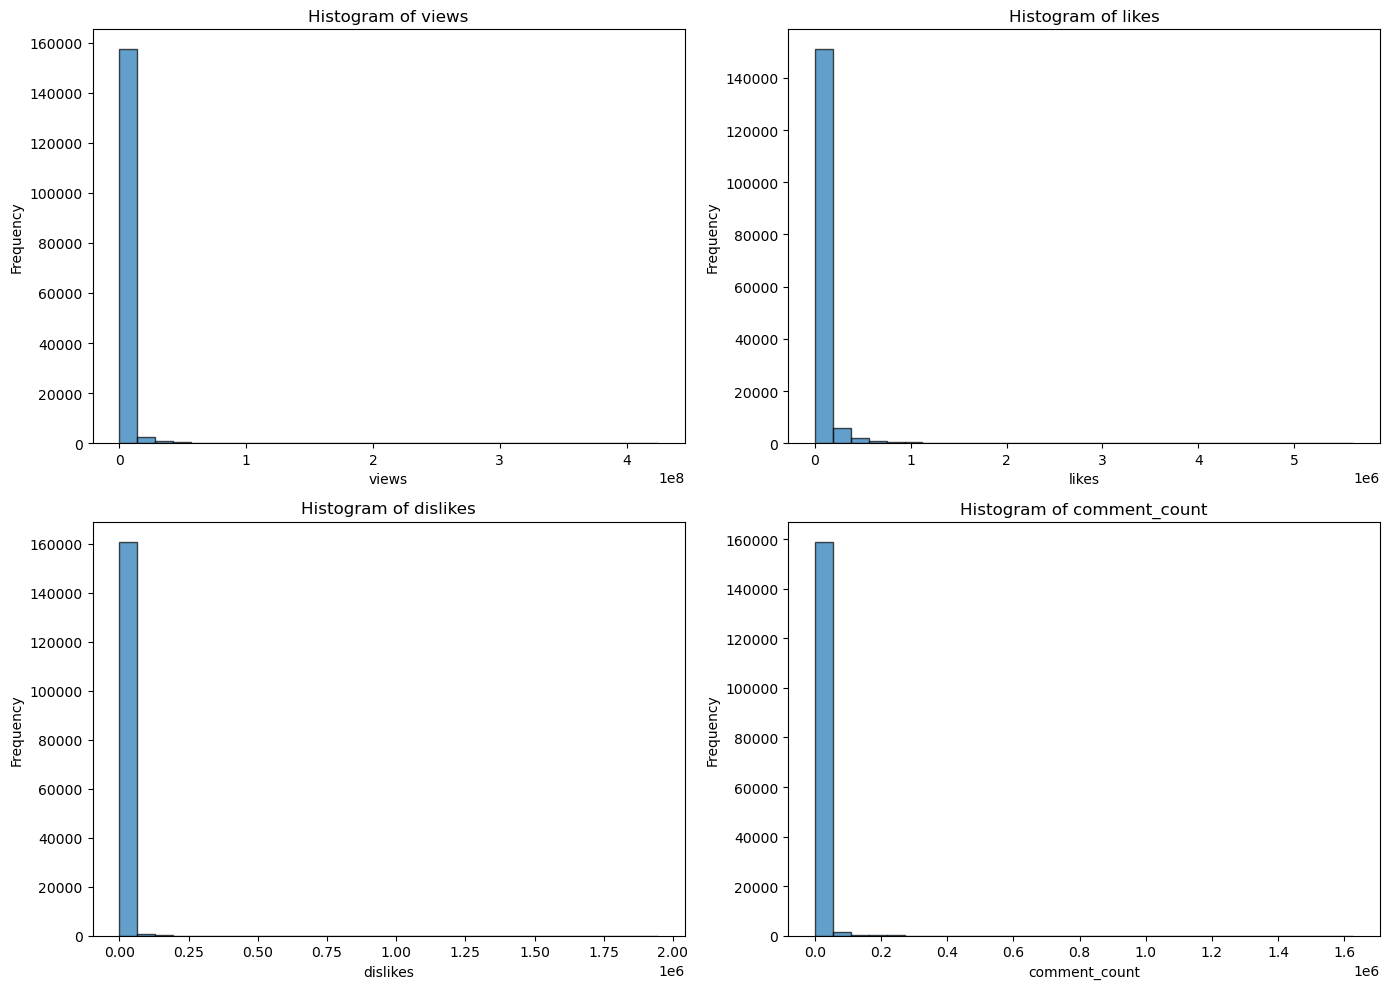

In [13]:
#data exploration for numerical columns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(train[column], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Exploration of Data Analysis(EDA) for Boolean Variables

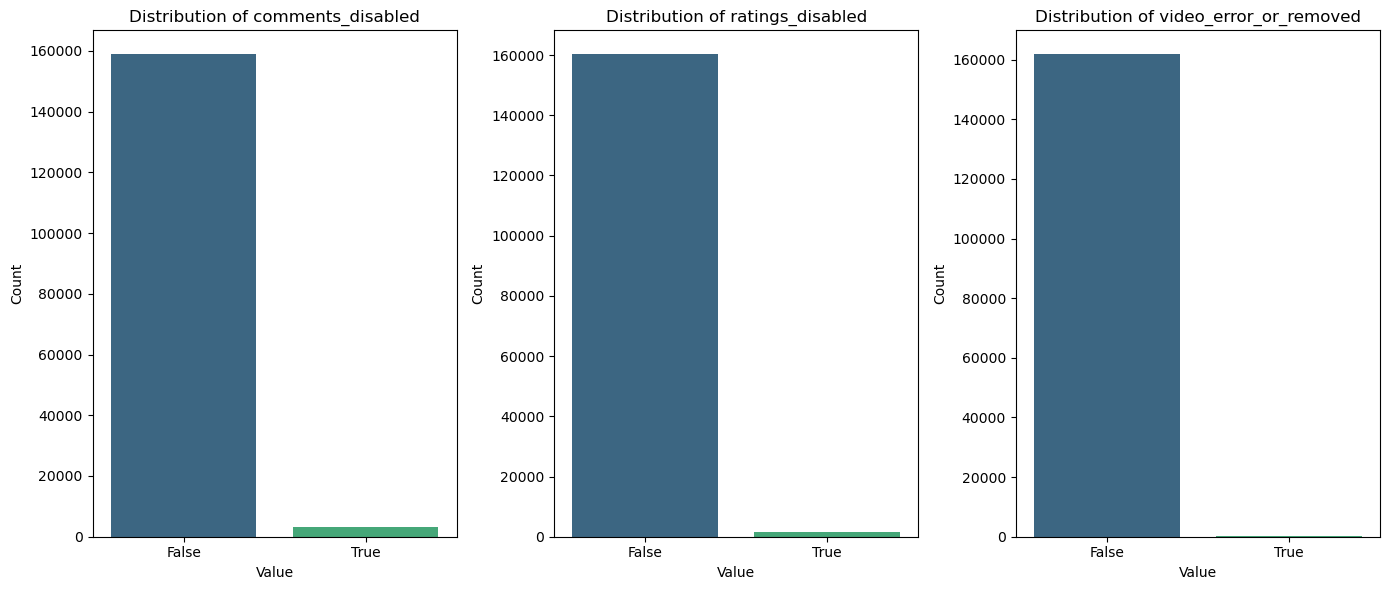

In [14]:
import seaborn as sns

# Define boolean columns
boolean_columns = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# Plot bar plots for each boolean column
plt.figure(figsize=(14, 6))
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(1, 3, i)
    # Count the occurrences of each boolean value
    counts = train[column].value_counts()
    # Plot bar plot
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Exploration of Data Analysis(EDA) for Date-Time Variables

/var/folders/6z/mn847gls7x5fvn9pl3c9lfmw0000gn/T/ipykernel_9244/3670767.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train['trending_day_of_week'], discrete=True, palette='viridis')


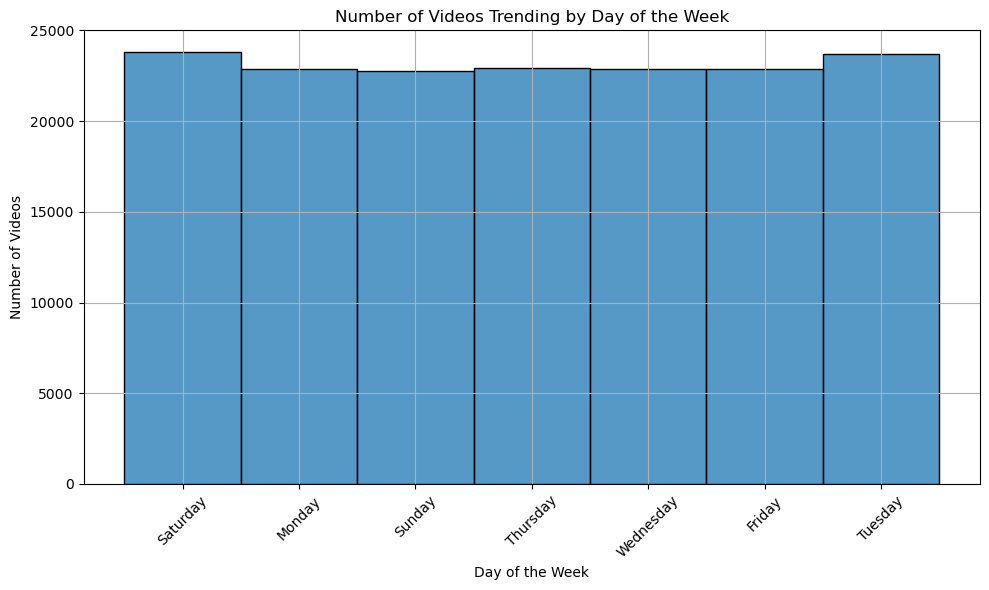

In [15]:
# convert the trending_date to datetime type
train['trending_date'] = pd.to_datetime(train['trending_date'], format='%y.%d.%m')
# Extract day of the week from 'trending_date'
train['trending_day_of_week'] = train['trending_date'].dt.day_name()

# Plot histogram of trending day of the week
plt.figure(figsize=(10, 6))
sns.histplot(train['trending_day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Trending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/6z/mn847gls7x5fvn9pl3c9lfmw0000gn/T/ipykernel_9244/2208940814.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train['day_of_week'], discrete=True, palette='viridis')


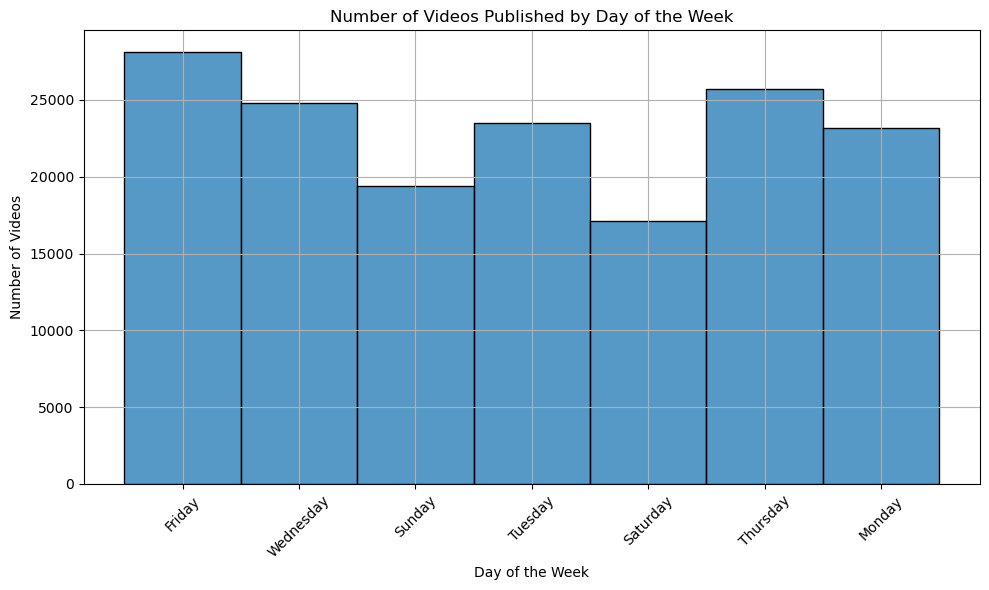

In [16]:
#convert the publish_date to datetime type
train['publish_time'] = pd.to_datetime(train['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# Extract day of the week from 'publish_time'
train['day_of_week'] = train['publish_time'].dt.day_name()

# Plot histogram of day of the week
plt.figure(figsize=(10, 6))
sns.histplot(train['day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical Description

In [17]:
numerical_description = train.describe()
print(numerical_description)

         category_id         likes      dislikes  comment_count         views
count  161848.000000  1.618480e+05  1.618480e+05   1.618480e+05  1.618480e+05
mean       19.710395  5.702207e+04  3.038615e+03   6.177708e+03  2.050362e+06
std         7.365759  2.090197e+05  2.780134e+04   3.111470e+04  9.359045e+06
min         1.000000  0.000000e+00  0.000000e+00   0.000000e+00  2.230000e+02
25%        17.000000  1.445000e+03  6.700000e+01   2.090000e+02  7.512375e+04
50%        23.000000  7.591000e+03  2.890000e+02   9.190000e+02  3.083285e+05
75%        24.000000  3.221750e+04  1.150000e+03   3.522000e+03  1.102676e+06
max        44.000000  5.613827e+06  1.944971e+06   1.626501e+06  4.245389e+08


In [18]:
# Statistical description of categorical columns
categorical_description = train[['category_id', 'location']].describe()
print(categorical_description)


         category_id
count  161848.000000
mean       19.710395
std         7.365759
min         1.000000
25%        17.000000
50%        23.000000
75%        24.000000
max        44.000000


# Exploration of Data Analysis for Numerical Values

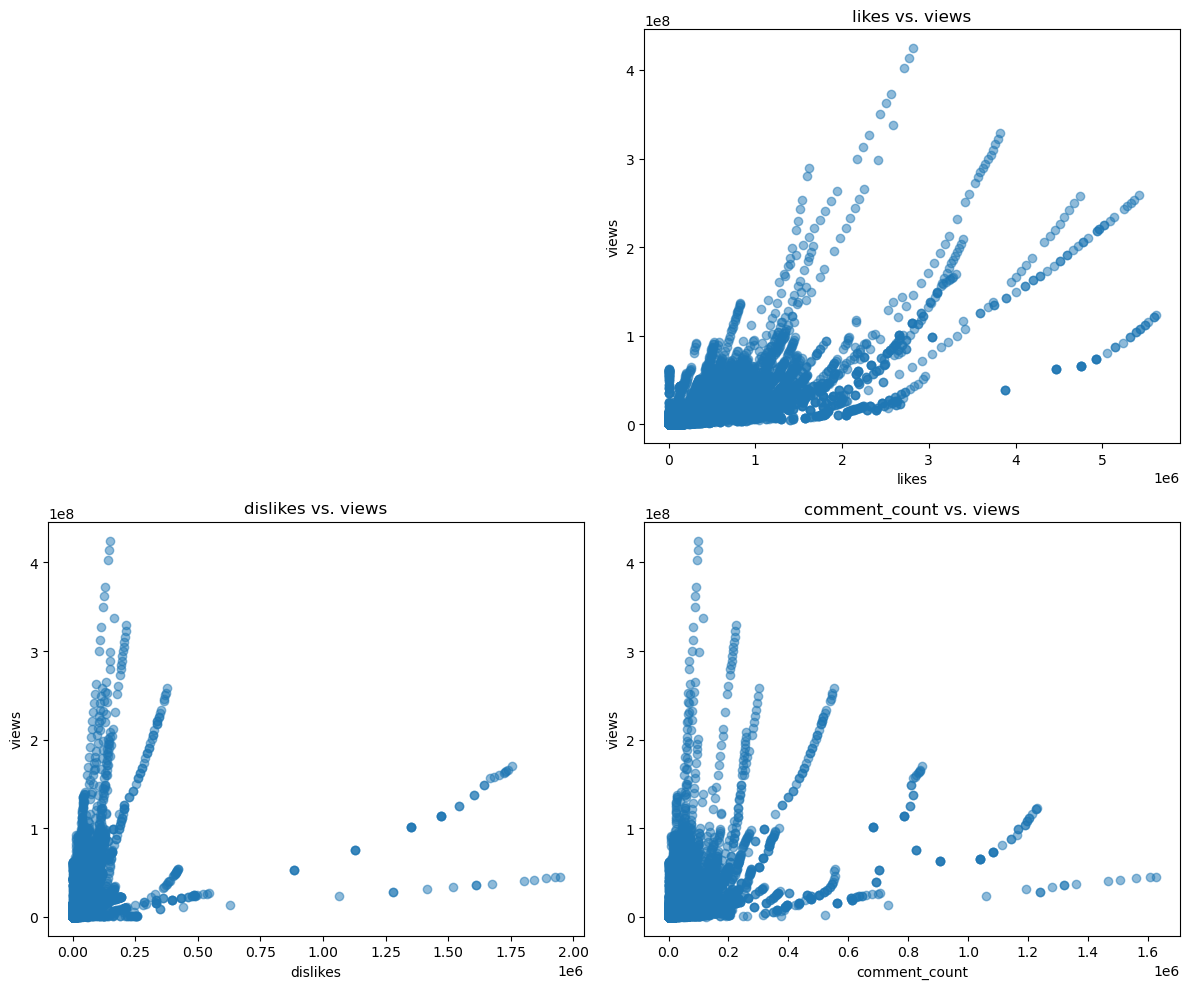

In [19]:
# Scatter plots for each numerical column vs. 'views'
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    if column != 'views':
        plt.subplot(2, 2, i)
        plt.scatter(train[column], train['views'], alpha=0.5)
        plt.title(f'{column} vs. views')
        plt.xlabel(column)
        plt.ylabel('views')

plt.tight_layout()
plt.show()

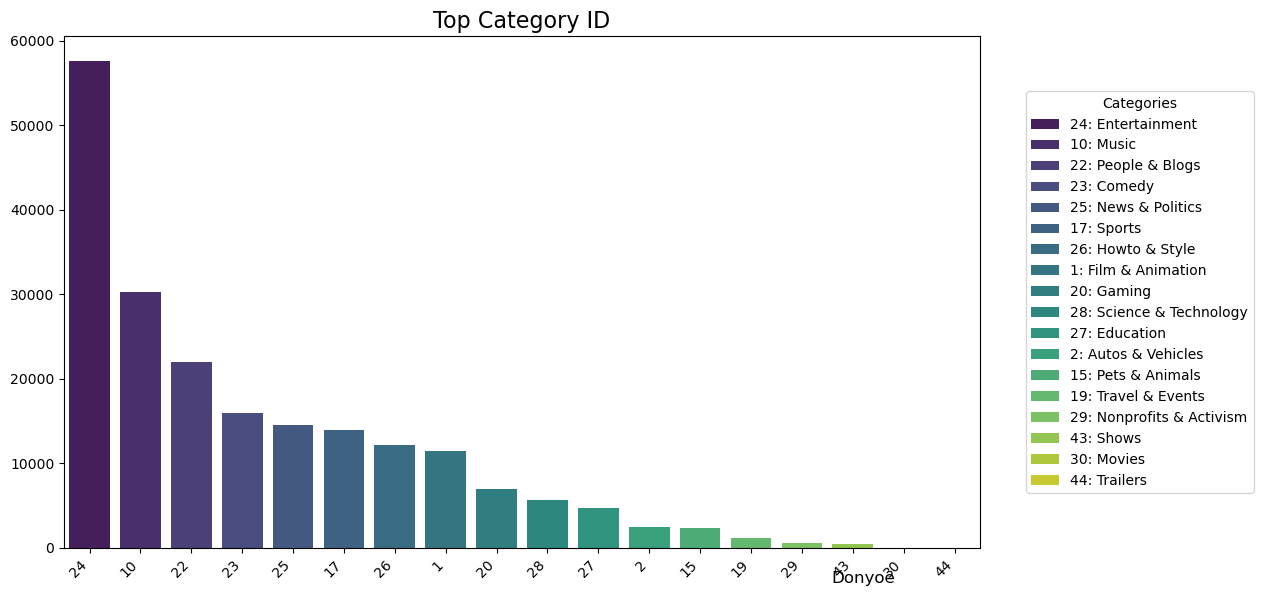

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by 'category_id' and count occurrences 
category_counts = merged_df.groupby('category_id').size().reset_index(name='N')

# Sort by 'N' in descending order
category_counts = category_counts.sort_values(by='N', ascending=False)
category_counts['category_id'] = pd.Categorical(category_counts['category_id'], categories=category_counts['category_id'], ordered=True)

# Create a dictionary to map 'category_id' to descriptive names
category_names = {
    1: "1: Film & Animation",
    2: "2: Autos & Vehicles",
    10: "10: Music",
    15: "15: Pets & Animals",
    17: "17: Sports",
    18: "18: Short Movies",
    19: "19: Travel & Events",
    20: "20: Gaming",
    21: "21: Videoblogging",
    22: "22: People & Blogs",
    23: "23: Comedy",
    24: "24: Entertainment",
    25: "25: News & Politics",
    26: "26: Howto & Style",
    27: "27: Education",
    28: "28: Science & Technology",
    29: "29: Nonprofits & Activism",
    30: "30: Movies",
    31: "31: Anime/Animation",
    32: "32: Action/Adventure",
    33: "33: Classics",
    34: "34: Comedy",
    35: "35: Documentary",
    36: "36: Drama",
    37: "37: Family",
    38: "38: Foreign",
    39: "39: Horror",
    40: "40: Sci-Fi/Fantasy",
    41: "41: Thriller",
    42: "42: Shorts",
    43: "43: Shows",
    44: "44: Trailers"
}

# Map 'category_id' to names in the 'category_counts' DataFrame
category_counts['category_name'] = category_counts['category_id'].map(category_names)

# Plot using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_counts, x='category_id', y='N', palette='viridis')  # Assign to 'barplot'

# Customize the plot to match your ggplot2 example
plt.title("Top Category ID", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.figtext(0.9, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Add a custom legend for category names on the side
handles = barplot.patches
legend_labels = [category_names[int(c)] for c in category_counts['category_id']]

# Position the legend on the right of the plot using 'bbox_to_anchor'
plt.legend(handles=handles[:len(legend_labels)], labels=legend_labels, title='Categories',
           bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

plt.show()

# Creating Engagement Metrics

In [21]:
# Create a new column
train['Engagement Metrics'] = train['likes'] + train['dislikes'] + train['comment_count']
# Display the DataFrame to check the new column
print(train[['likes', 'dislikes', 'comment_count', 'Engagement Metrics']].head())

         likes  dislikes  comment_count  Engagement Metrics
50252      319        15             63                 397
15943     3621      1735           1967                7323
162168    4168       141            266                4575
110741     334        77            138                 549
142650  136181      1980          10259              148420


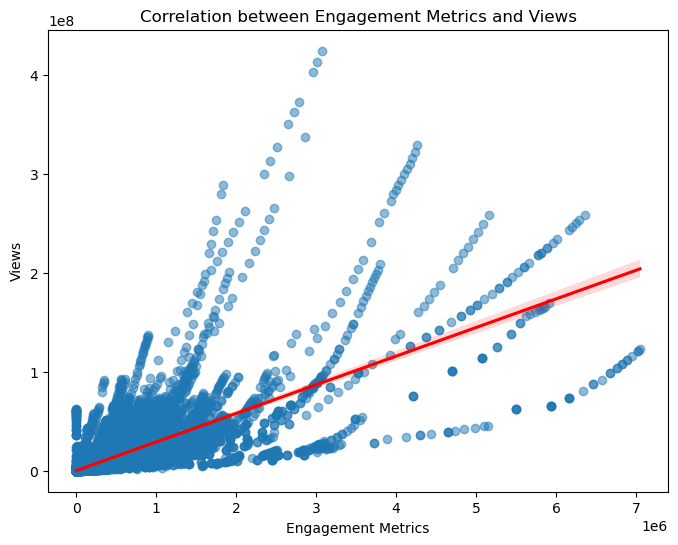

In [22]:
# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Engagement Metrics', y='views', data=train, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Engagement Metrics and Views')
plt.xlabel('Engagement Metrics')
plt.ylabel('Views')
plt.show()

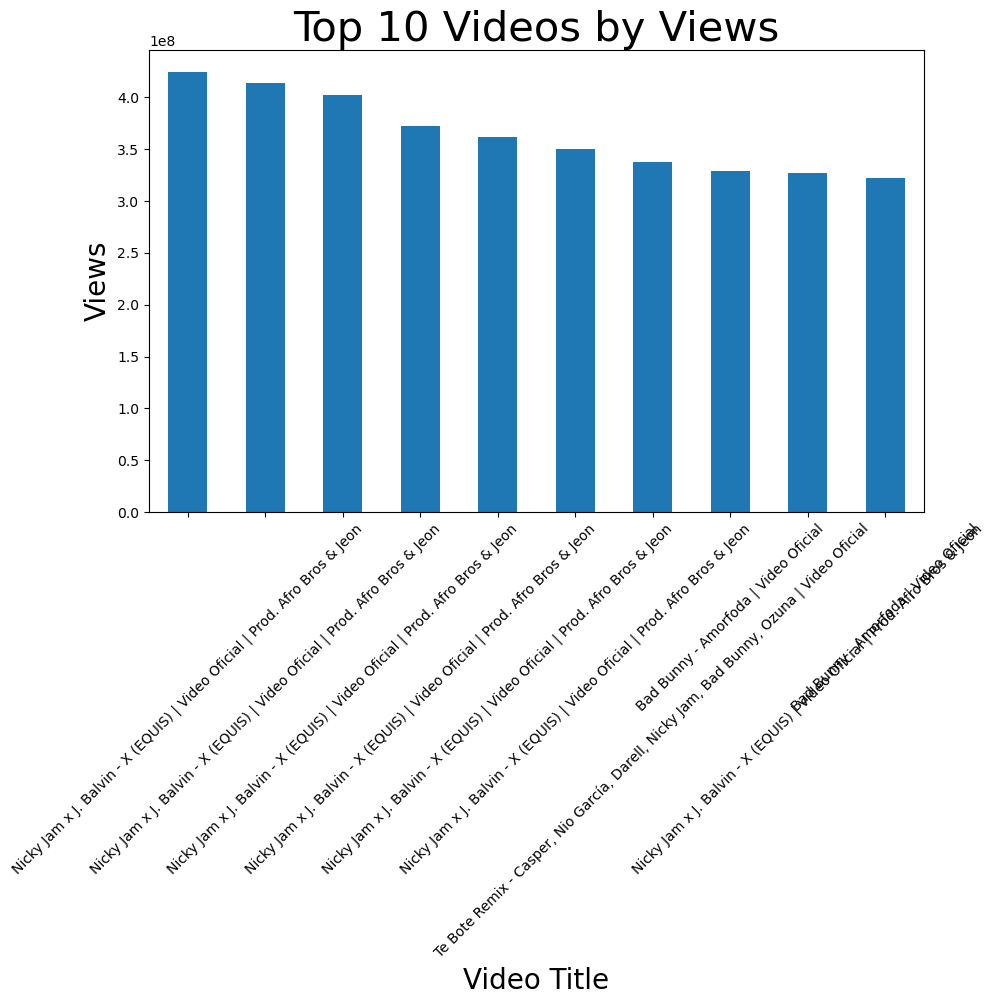

In [23]:
top_videos = train.nlargest(10, 'views')[['title', 'views']]

# To plot the chart

top_videos.set_index('title')['views'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Video Title',fontsize=20)
plt.ylabel('Views',fontsize=20)
plt.title('Top 10 Videos by Views',fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [24]:
# what about top 50? 
## Display engagement metrics for top 50 videos
top_50_videos = train.nlargest(50, 'views')
print(top_50_videos[['title', 'Engagement Metrics','location']])

                                                    title  Engagement Metrics  \
150857  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3067426   
150657  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3011515   
150453  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2956724   
149869  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2786627   
149686  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2723032   
149497  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2650114   
156905  Te Bote Remix - Casper, Nio García, Darell, Ni...             2862074   
147990               Bad Bunny - Amorfoda | Video Oficial             4264625   
149116  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2505131   
147786               Bad Bunny - Amorfoda | Video Oficial             4231351   
147582               Bad Bunny - Amorfoda | Video Oficial             4198350   
148922  Nicky Jam x J. Balvi

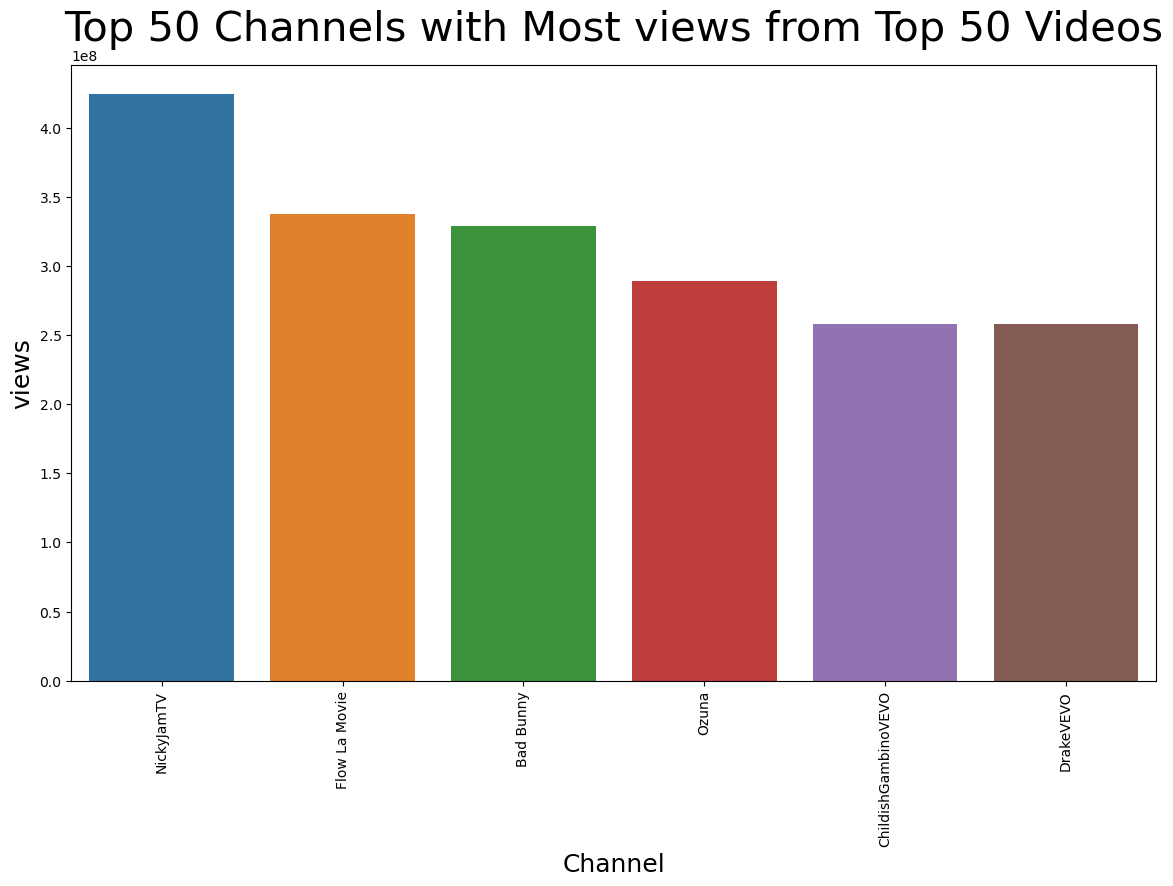

In [25]:
import seaborn as snb
content = top_50_videos.groupby('channel_title')['views'].max()

# Sort values to get the top 50 channels with the most views
content = content.sort_values(ascending=False).head(50)
content = content.reset_index()  # Convert index to column

# Plotting the results
plt.figure(figsize=(14, 8))
snb.barplot(x='channel_title', y='views', data=content)
plt.title('Top 50 Channels with Most views from Top 50 Videos', fontsize=30)
plt.ylabel('views', fontsize=18)
plt.xlabel('Channel', fontsize=18)
plt.xticks(rotation=90)
plt.show()

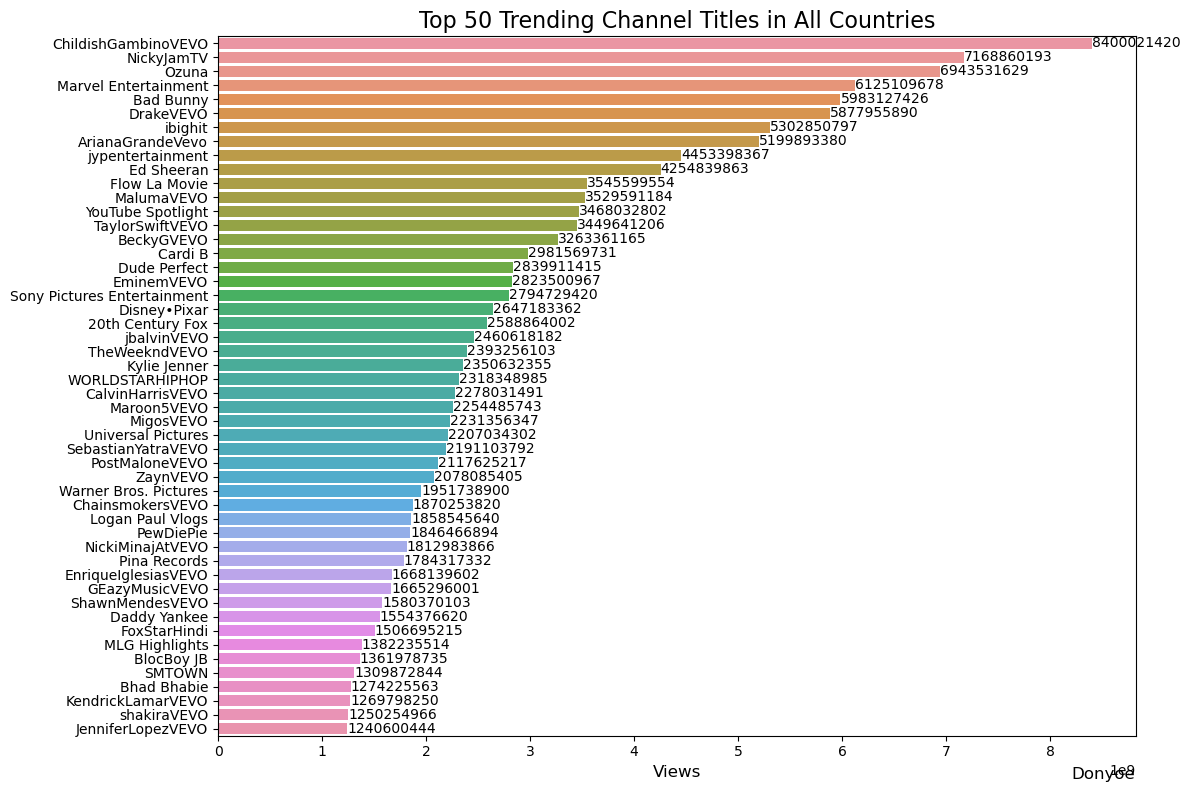

In [26]:
channel_counts = train.groupby('channel_title')['views'].sum().reset_index()

# Sort values and select top 10 channels
top_10_channels = channel_counts.sort_values(by='views', ascending=False).head(50)

# Plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='views', y='channel_title', data=top_10_channels,orient='h')

# Add labels
for index, value in enumerate(top_10_channels['views']):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

# Customize the plot
plt.title('Top 50 Trending Channel Titles in All Countries', fontsize=16)
plt.xlabel('Views', fontsize=12)
plt.ylabel(None)
plt.xticks(rotation=0)  # x-axis ticks don't need rotation in horizontal bar plot
plt.tight_layout()

# Add caption
plt.figtext(0.95, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()

# Correlation Metrics for Variables

                  views     likes  dislikes  comment_count
views          1.000000  0.787787  0.425866       0.511448
likes          0.787787  1.000000  0.458151       0.789545
dislikes       0.425866  0.458151  1.000000       0.713717
comment_count  0.511448  0.789545  0.713717       1.000000


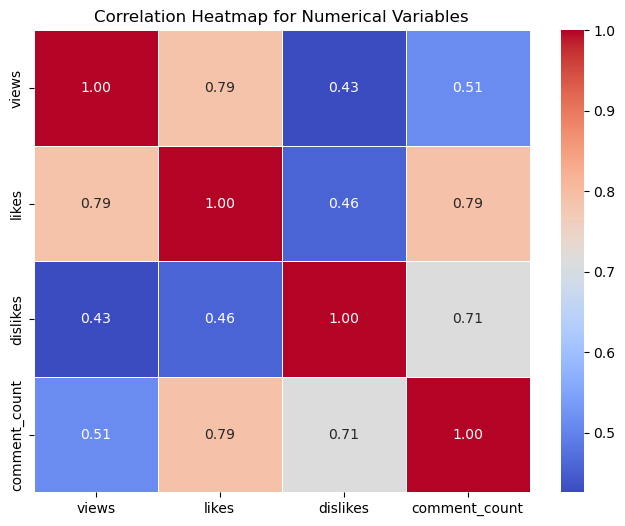

In [27]:
# add category_id to numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Compute the correlation matrix
correlation_matrix = train[numerical_columns].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

# Assign Score for Numerical Values

In [28]:
import pandas as pd

# Assuming the correlation values are manually entered from the heatmap
correlation_values = {
    'likes': 0.784,          # Correlation of likes with views
    'dislikes': 0.416,       # Correlation of dislikes with views
    'comment_count': 0.502 # Correlation of comment_count with views
}

# Convert the correlation values to absolute values
abs_correlations = {key: abs(value) for key, value in correlation_values.items()}

# Calculate the total sum of absolute correlations
total_correlation = sum(abs_correlations.values())

# Calculate weights by normalizing the absolute correlation values
weights = {key: value / total_correlation for key, value in abs_correlations.items()}

# Convert the weights to a DataFrame for better visualization
weights_df = pd.DataFrame(list(weights.items()), columns=['Variable', 'Weight'])

# Display the weights
print("Calculated Weights of Independent Variables Relative to 'Views':")
print(weights_df)

Calculated Weights of Independent Variables Relative to 'Views':
        Variable    Weight
0          likes  0.460635
1       dislikes  0.244418
2  comment_count  0.294947


# Creating Ranks Based on Score

In [29]:
import pandas as pd

weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

train['score'] = (
    weights['likes'] * train['likes'] -
    weights['dislikes'] * train['dislikes'] +
    weights['comment_count'] * train['comment_count'] 
)

train['rank'] = train['score'].rank(ascending=False, method='min')

df_sorted = train.sort_values(by='rank')

print(df_sorted)

#output_filename = 'ranked_videos_combined.csv'
#df_sorted.to_csv(output_filename, index=False)

#print("Listing of Every Video with Individual Scores and Ranks Across All Locations:")
#print(df_sorted[['video_id', 'views', 'likes', 'dislikes', 'comment_count', 'category_id', 'location', 'score', 'rank']])
#print(f"\nThe ranking of all videos from all locations has been saved to '{output_filename}'.")


           video_id trending_date                                  title  \
199634  7C2z4GqqS5E    2018-06-01    BTS (방탄소년단) 'FAKE LOVE' Official MV   
199433  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
158913  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
199222  7C2z4GqqS5E    2018-05-30    BTS (방탄소년단) 'FAKE LOVE' Official MV   
199016  7C2z4GqqS5E    2018-05-29    BTS (방탄소년단) 'FAKE LOVE' Official MV   
...             ...           ...                                    ...   
131591  LFhT6H6pRWg    2017-12-29  PSA from Chairman of the FCC Ajit Pai   
131799  LFhT6H6pRWg    2017-12-30  PSA from Chairman of the FCC Ajit Pai   
132020  LFhT6H6pRWg    2017-12-31  PSA from Chairman of the FCC Ajit Pai   
132222  LFhT6H6pRWg    2018-01-01  PSA from Chairman of the FCC Ajit Pai   
132430  LFhT6H6pRWg    2018-01-02  PSA from Chairman of the FCC Ajit Pai   

       channel_title  category_id        publish_time  \
199634       ibighit          

# EDA for Score for Top 50 Channels

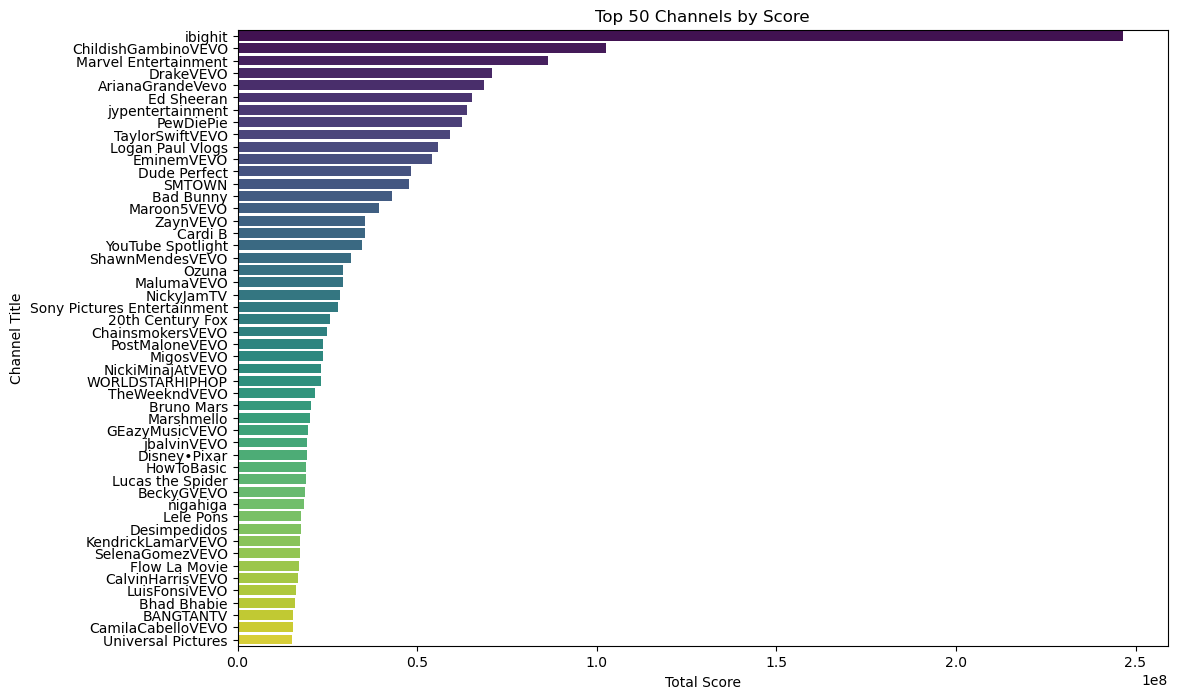

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'train'
weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

# Calculate score and rank
train['score'] = (
    weights['likes'] * train['likes'] -
    weights['dislikes'] * train['dislikes'] +
    weights['comment_count'] * train['comment_count']
)

train['rank'] = train['score'].rank(ascending=False, method='min')

# Group by channel_title and sum the scores
channel_scores = train.groupby('channel_title')['score'].sum().reset_index()

# Sort by total score and get top 50 channels
top_channels = channel_scores.sort_values(by='score', ascending=False).head(50)

# Create a bar plot for the top 50 channels
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='channel_title', data=top_channels, palette='viridis')
plt.title('Top 50 Channels by Score')
plt.xlabel('Total Score')
plt.ylabel('Channel Title')
plt.show()

# Creating Word Cloud

  Obtaining dependency information for palettable from https://files.pythonhosted.org/packages/cf/f7/3367feadd4ab56783b0971c9b7edfbdd68e0c70ce877949a5dd2117ed4a0/palettable-3.3.3-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 5.0 MB/s eta 0:00:00a 0:00:01


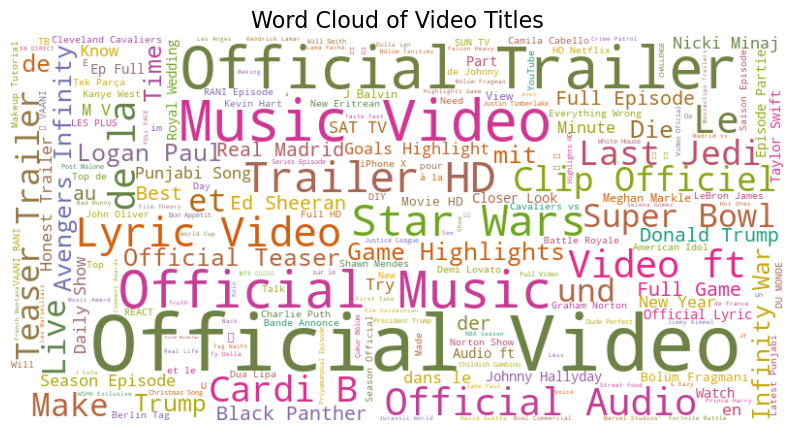

In [34]:
!pip install palettable

# Creating Word Cloud-Video Titles
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Dark2_6

# Assuming your DataFrame is named 'mergeda_df'
# Concatenate all titles into a single string
all_titles = " ".join(train['title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Titles', fontsize=16)
plt.show()

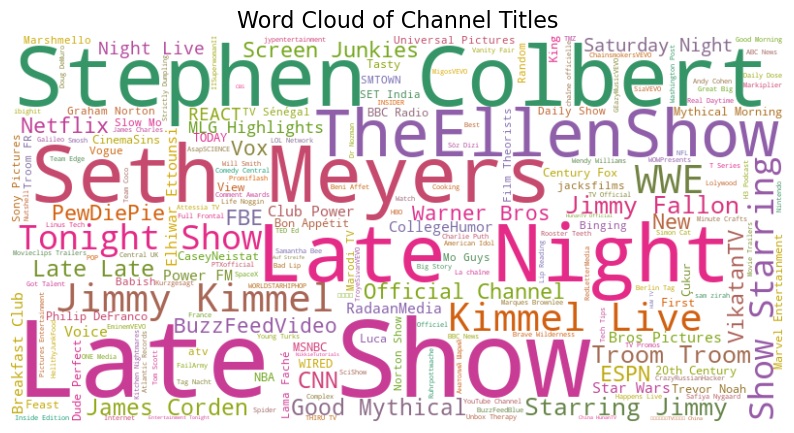

In [35]:
# Creating Word Cloud-Channel Title
all_channel_titles = " ".join(train['channel_title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_channel_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Channel Titles', fontsize=16)
plt.show()

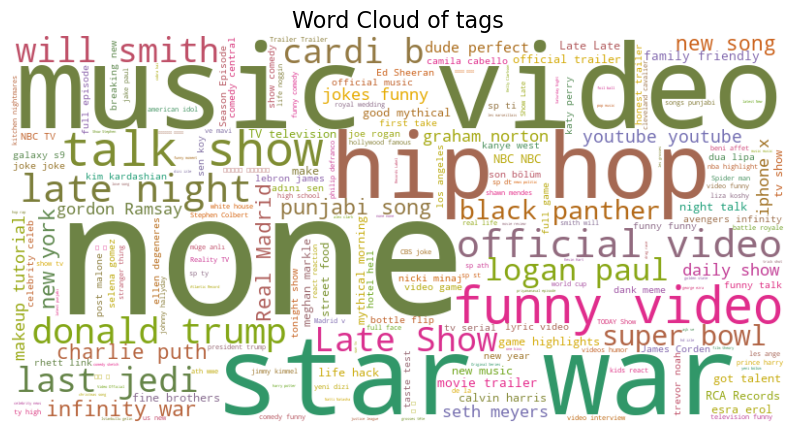

In [36]:
# Creating Word Cloud-tags
all_tags = " ".join(train['tags'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_tags)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of tags', fontsize=16)
plt.show()

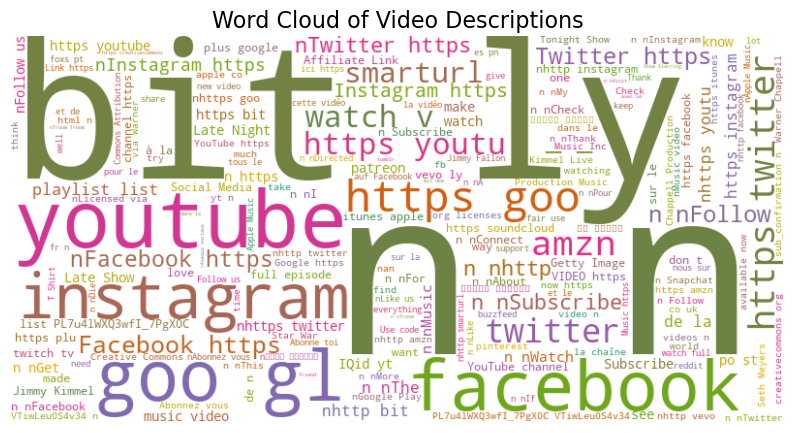

In [38]:
# Creating Word Cloud-description
all_description = " ".join(train['description'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_description)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Descriptions', fontsize=16)
plt.show()